In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [2]:
%autoreload 2
from src import ODE_euler


[02-06 12:49:10][INFO] 2025-02-06 12:49:10.071652
[02-06 12:49:10][INFO] Hodalys| 2025-02-06 12:49:10.375674
[02-06 12:49:10][INFO] 2025-02-06 12:49:10.375674
[02-06 12:49:10][INFO] Hodalys| 2025-02-06 12:49:10.382326


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



In [49]:
import numpy as np

f = lambda t, y: -5 * y + 5 * (t)**2 + 2 * t 
a = 0
b = 1
y_t0 = 0.333
N = 10
N1=5
N2 = 100

# Método de Euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
ys1, ts1, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N1)
ys2, ts2, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N2)

#def real_solution(t):
    #return (t)**2 + 1 / (3 * np.exp(-5 * t))

#t_real = np.linspace(a, b, 10) # More points for a smooth curve
#y_real = real_solution(t_real)
y_real, t_real, h_real = ODE_euler(a=a, b=b, f=lambda t, y : (t)**2 + 1 / (3 * np.exp(-5 * t)), y_t0=y_t0, N=N)

print("Valores obtenidos por el método de Euler:")
for t, y in zip(ts, ys):
    print(f"t: {t:.2f}, y: {y:.4f}")

print("Valores reales:")
for t, y in zip(t_real, y_real):
    print(f"t: {t:.2f}, y: {y:.4f}")

print("\nValor de h: ", h)

Valores obtenidos por el método de Euler:
t: 0.00, y: 0.3330
t: 0.10, y: 0.1665
t: 0.20, y: 0.1083
t: 0.30, y: 0.1141
t: 0.40, y: 0.1621
t: 0.50, y: 0.2410
t: 0.60, y: 0.3455
t: 0.70, y: 0.4728
t: 0.80, y: 0.6214
t: 0.90, y: 0.7907
t: 1.00, y: 0.9803
Valores reales:
t: 0.00, y: 0.3330
t: 0.10, y: 0.3663
t: 0.20, y: 0.4223
t: 0.30, y: 0.5169
t: 0.40, y: 0.6753
t: 0.50, y: 0.9376
t: 0.60, y: 1.3687
t: 0.70, y: 2.0742
t: 0.80, y: 3.2270
t: 0.90, y: 5.1110
t: 1.00, y: 8.1926

Valor de h:  0.01


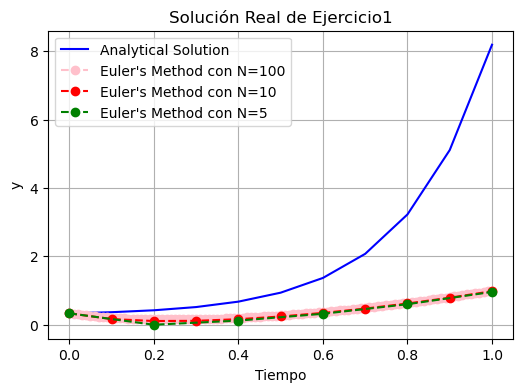

In [52]:
import matplotlib.pyplot as plt
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(t_real, y_real, label='Analytical Solution', color='blue')
plt.plot(ts2, ys2, label="Euler's Method con N=100", marker='o', linestyle='--', color='pink')
plt.plot(ts, ys, label="Euler's Method con N=10", marker='o', linestyle='--', color='red')
plt.plot(ts1, ys1, label="Euler's Method con N=5", marker='o', linestyle='--', color='green')

plt.title('Solución Real de Ejercicio1')
plt.xlabel('Tiempo')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Errores
Calcule el error relativo para diferentes valores de N.

In [47]:
y_real_euler = []
for t in ts:
    y_real_euler.append(real_solution(t))

error_relativo = np.abs((np.array(ys) - np.array(y_real_euler)) / np.array(y_real_euler))

print("\nError Relativo para cada punto:")
for t, y_aprox, y_real_val, error in zip(ts, ys, y_real_euler, error_relativo):
    print(f"t = {t:.2f}: Error relativo = {error:.4f}")
    
promedio = error / 11
print(f"Promedio de error relativo = {promedio: 4f}")


Error Relativo para cada punto:
t = 0.00: Error relativo = 0.0010
t = 0.10: Error relativo = 0.7025
t = 0.20: Error relativo = 0.8856
t = 0.30: Error relativo = 0.9279
t = 0.40: Error relativo = 0.9382
t = 0.50: Error relativo = 0.9441
t = 0.60: Error relativo = 0.9510
t = 0.70: Error relativo = 0.9590
t = 0.80: Error relativo = 0.9670
t = 0.90: Error relativo = 0.9743
t = 1.00: Error relativo = 0.9806
Promedio de error relativo =  0.089143
